# Statistical Modeling 

Statistical modeling is a mathematical approach used to represent and analyze the relationships between variables in data. It involves constructing a model that captures the underlying patterns and structures within a dataset, often with the goal of making predictions or understanding the data better.


    Independent variables are also known as: predictor variables, input variables, explanatory variables, features
    
    Dependent variables are also known as: outcome variables, target variables, response variables


## Model Loss

A loss function evaluates how well your model represents the relationship between data variables.



## Simple Linear Regression

The model notation is 

$$y=mx+c$$

or, alternatively

$$y = \beta_0+ \beta_1 x $$

## Calculating M

### The Least-Squares Method

We can calculate $\hat{m}$ (the slope of the best-fit line) using this formula:

$$\hat{m} = \rho \frac{S_y}{S_x}$$

Breaking down those components, we have:

* $\hat{m}$: the estimated slope
* $\rho$: the Pearson correlation, represented by the Greek letter "Rho"
* $S_y$: the standard deviation of the y values
* $S_x$: the standard deviation of the x values

## Calculating C

Then once we have the slope value ($\hat{m}$), we can put it back into our formula $(\hat{y} = \hat{m} x + \hat{c})$ to calculate the intercept. The idea is that

$$\bar{y} = \hat{c} + \hat{m} \bar{x}$$

so

$$\hat{c} = \bar{y} - \hat{m} \bar{x}$$

Breaking down those components, we have:

* $\hat{c}$: the estimated intercept
* $\bar{y}$: the mean of the y values
* $\hat{m}$: the estimated slope
* $\bar{x}$: the mean of the x values

In [193]:
# imports 

import numpy as np 
import seaborn as sns
import pandas as pd
import statsmodels.api as sm

In [194]:

# X = Independent Variable
X = np.array([1,2,3,4,5,6,8,8,9,10], dtype=np.float64)
# Y = Dependent Variable
Y = np.array([7,7,8,9,9,10,10,11,11,12], dtype=np.float64)

<Axes: >

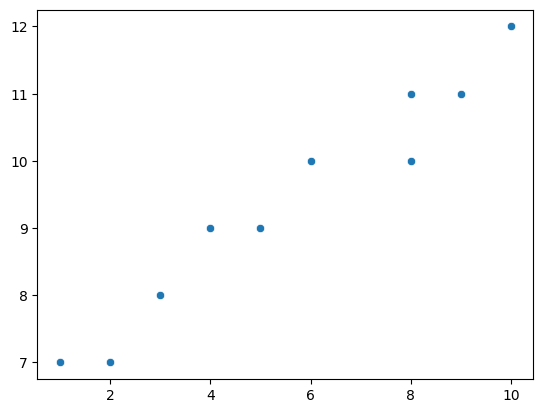

In [195]:
sns.scatterplot(x=X,y=Y)

<Axes: >

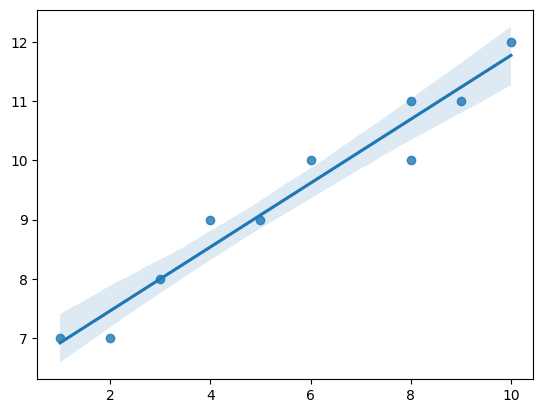

In [196]:
sns.regplot(x=X,y=Y)

Write a function `calc_slope` that returns $\hat{m}$ for a given set of x and y data.

The formula is:

$$\hat{m} = \rho \frac{S_y}{S_x}$$

In [197]:
np.corrcoef(X,Y)

array([[1.        , 0.97572421],
       [0.97572421, 1.        ]])

In [198]:
# calcute p-corr
p_corr = np.corrcoef(X,Y)[0,1]
p_corr

np.float64(0.9757242123141516)

In [199]:
# y std
y_std =  Y.std()
y_std


np.float64(1.624807680927192)

In [200]:
# alternative
# np.std(Y)

In [201]:
# x std
x_std =  X.std()
x_std

np.float64(2.9393876913398134)

In [202]:
# calculate  m
m = p_corr * (y_std / x_std)
m


np.float64(0.5393518518518519)

In [203]:
# slope function
def slope(X,Y):
    # corr_coef
    p_corr = np.corrcoef(X,Y)[0][1]
    #std y
    std_y = np.std(Y)
    #std X
    std_x = X.std()
    #m
    m = p_corr*(std_y/std_x)
    return m

In [204]:
# calculate slope for our data 
slope(X,Y)


np.float64(0.5393518518518519)

## Calculating the Intercept

Now that we have our estimated slope $\hat{m}$, we can calculate the estimated intercept $\hat{c}$.

As a reminder, the calculation for the best-fit line's y-intercept is:

$$\hat{c} = \bar{y} - \hat{m} \bar{x}$$

Write a function `calc_intercept` that returns $\hat{c}$ for a given $\hat{m}$, x, and y.


In [205]:
# get the y mean
y_mean = Y.mean()
y_mean

np.float64(9.4)

In [206]:
# get the x mean
x_mean = X.mean()
x_mean


np.float64(5.6)

In [207]:
# calculate the intecept
y_mean - (slope(X,Y)*x_mean)


np.float64(6.37962962962963)

In [208]:
# get the intercept function
def get_c(X,Y):
    #y mean
   Y_mean = Y.mean() 
   #x_mean
   X_mean = np.mean(X)
   
   m = slope(X,Y)
   
   c = Y_mean - (X_mean*m)
   
   return c
   

In [209]:
# get c for our data set 
c = Y.mean() - (X.mean()*slope(X,Y))
c

np.float64(6.37962962962963)

## Predicting a datapoint 

In [210]:
# y = mx + c

y = slope(X,Y)*2000 + c
y

np.float64(1085.0833333333333)

In [225]:
# to predict a data point 
#when x is  2
y = slope(X,Y)*3.5 + get_c(X,Y)
y


np.float64(7.216051988168304)

# Todo

In [ ]:
# make a model for sales(y -(depedent)) and any other column(x) 
# in the provided dataset to create a model to predict y using 
# the provided dataset
# create a new column (sales_pred)  and add it to the dataframe  

df = pd.read_csv("./data/advertising.csv")
df.head()

# Linear Rigression With StatsModel

An example of linear Regression model ands it evalution using stats model 

In [214]:
# read data and display head 
df = pd.read_csv("./data/advertising.csv")
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [215]:
# get X and Y

X = df["TV"]
Y = df["sales"]



<Axes: xlabel='TV', ylabel='sales'>

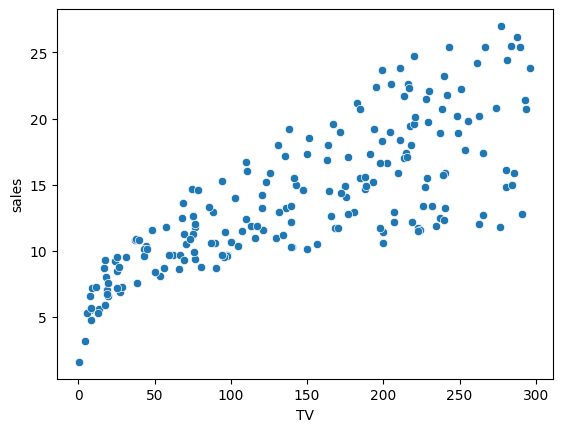

In [216]:
# scatter plot 
sns.scatterplot(x=X,y=Y)

<Axes: xlabel='TV', ylabel='sales'>

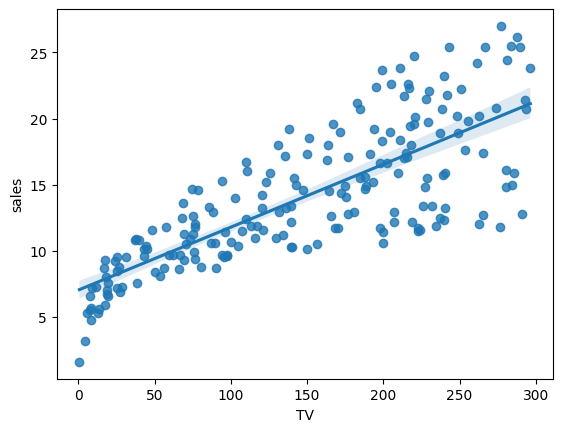

In [217]:
sns.regplot(x=X,y=Y)

In [218]:
# build model 
model = sm.OLS(endog=Y, exog=sm.add_constant(X))



In [219]:
# train the model
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Tue, 04 Nov 2025   Prob (F-statistic):           1.47e-42
Time:                        09:37:34   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Evaluating and Interpreting the Model

### F-Test 
#### Measuring Statistical Significance

So, is our overall model statistically significant? Let's frame this in terms of a null and alternative hypothesis:

    H 0 (null hypothesis): the intercept-only model fits the data just as well as (or better than) our model
    H a (alternative hypothesis): our model fits the data better than the intercept-only model


In [220]:
# F1- score
results.f_pvalue,results.fvalue

(np.float64(1.4673897001947095e-42), np.float64(312.1449943727128))

    *For fp-values below the significant value e.g 0.05 we reject the null hypothesis*

## R-Squared
#### Measuring Goodness of Fit
We can quantify how much of the variation in the dependent variable is explained by our model. This measure is called the R 2 or coefficient of determination.

In [221]:
#r2 score
results.rsquared


np.float64(0.611875050850071)

    *out put is a paercentage between 0 and 1 higher values are better*

### Other evaluation Metrics
#### Model parameters:

In [222]:
# y=mx+c
# m,c
results



#### Model parameter p-values:

In [223]:
# p-values  for m & c


#### Model Confidence intervals 
returns value ranges at 95% percent confidence intervals 

In [224]:
# confidence intervals

